In [1]:
%matplotlib inline
import sys                                 
import os                                  
import numpy as np                         
import matplotlib.pyplot as plt  
import pickle
                                           
                                           
caffe_root = os.environ["CAFFE_ROOT"]      
os.chdir(caffe_root)                       
print caffe_root                           
sys.path.insert(0, caffe_root + 'python')  
import caffe                               

/home/maohz12/pruning/


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 25 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 25 days


In [11]:
prototxt = '/home/maohz12/pruning/3_prototxt_solver/L2/train_val.prototxt'      
caffemodel = '/home/maohz12/pruning/4_model_checkpoint/alexnet/alexnet9x.caffemodel'    
# caffemodel = '/home/maohz12/pruning/4_model_checkpoint/bvlc_alexnet.caffemodel' 
dir_t = '/home/maohz12/pruning/2_results/kmeans/alexnet/'
codebook = pickle.load(open(dir_t + 'codebook.pkl'))
                                                                                          
net = caffe.Net(prototxt, caffemodel, caffe.TEST)                                         

In [26]:
print codebook.keys()
# print codebook
for key in codebook.keys():
    print codebook[key].size

['fc6', 'fc7', 'fc8', 'conv3', 'conv2', 'conv1', 'conv5', 'conv4']
14
13
14
254
255
254
235
250


In [21]:
# """
# Extension for disabling autoscrolling long output, which is super annoying sometimes
# Usage:

# You can also put the js snippet below in profile_dir/static/js/custom.js
# """

# from IPython.display import display, Javascript

# disable_js = """
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }
# """

# def load_ipython_extension(ip):
#     display(Javascript(disable_js))
#     print ("autoscrolling long output is disabled")
    
# %load_ext disable_autoscroll

conv2


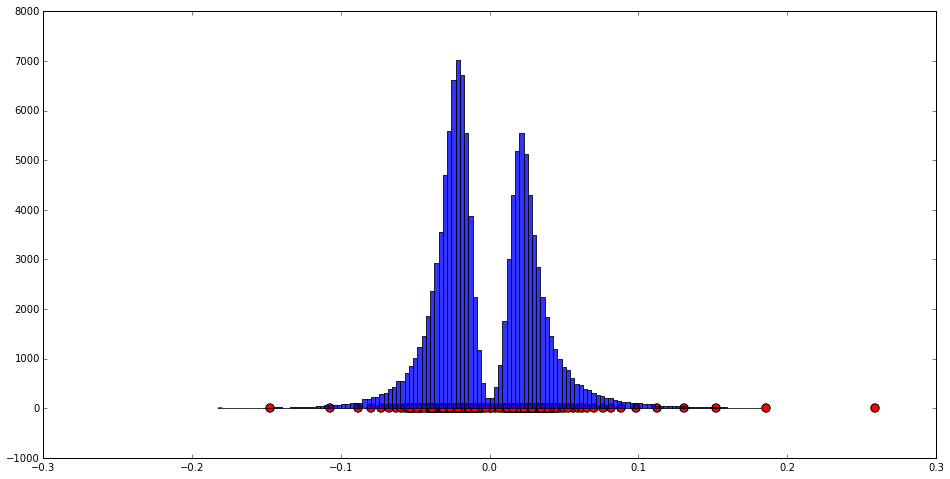

In [48]:

layers = filter(lambda x:'conv' in x or 'fc' in x, net.params.keys())
layers= ['conv2']
for i,layer in enumerate(layers):
    W = net.params[layer][0].data   
    W = W[np.where(W!=0)] 
    numBins = 128       
    code = codebook[layer]
    print layer
    plt.figure(figsize=(16,8))    
    std = np.std(W)
    W_no = W[np.where((abs(W) < 5 * std))]
#     W_no = W
    plt.hist(W_no.flatten(), numBins, color='blue', alpha=0.8) 
    plt.scatter(code, np.zeros(code.shape), marker='o', c='red', s=70)
    plt.show()         